# Zillow Zestimate Prediction

Miloy Ajmera (majmera@andrew.cmu.edu) / 17-634: Applied Machine Learning, Spring 2023

In [242]:
import os
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns  # We'll mostly use seaborn, a stats visualization library
import matplotlib.pyplot as plt  # Seaborn wrap Matplotlib for visualization. We'll occasionaly want to make custom changes to the plots.

## Load the Zillow Zestimate Prediction dataset.
Read and prepare the data. Consider how you plan to deal with missing data: will you remove columns, if so, under what conditions? Will you attempt to impute any data?

In [243]:
filepath = "zillow/"
# Load the dataframes
train_2016 = pd.read_csv(filepath + "train_2016.csv", parse_dates=["transactiondate"], low_memory=False)
train_2017 = pd.read_csv(filepath + "train_2017.csv", parse_dates=["transactiondate"], low_memory=False)
properties_2016 = pd.read_csv(filepath + "properties_2016.csv", low_memory=False)
properties_2017 = pd.read_csv(filepath + "properties_2017.csv", low_memory=False)

In [244]:
# Extract different components of the transaction date (year, month, quarter, and day) and storing them in separate columns

# Train data 2016
train_2016["transactiondate_year"] = train_2016["transactiondate"].dt.year
train_2016["transactiondate_month"] = train_2016["transactiondate"].dt.month
train_2016['transactiondate_quarter'] = train_2016['transactiondate'].dt.quarter
train_2016["transactiondate"] = train_2016["transactiondate"].dt.day

# Train data 2016
train_2017["transactiondate_year"] = train_2017["transactiondate"].dt.year
train_2017["transactiondate_month"] = train_2017["transactiondate"].dt.month
train_2017['transactiondate_quarter'] = train_2017['transactiondate'].dt.quarter
train_2017["transactiondate"] = train_2017["transactiondate"].dt.day

In [245]:
# Merge train_2016 with properties_2016
data_2016 = pd.merge(train_2016, properties_2016, on='parcelid', how = 'left')

# Merge train_2017 with properties_2017
data_2017 = pd.merge(train_2017, properties_2017, on='parcelid', how = 'left')


In [246]:
# Concatenate data_2016 and data_2017 into a single dataframe
all = pd.concat([data_2016, data_2017],  ignore_index=True)
print(f'All shape: {all.shape}')


All shape: (167888, 63)


In [247]:
# Create a list of histograms
histogram_columns = all.columns.tolist()
header_columns = ['parcelid', 'logerror', 'transactiondate', 'transactiondate_year', 'transactiondate_month', 'transactiondate_quarter']
ignore_columns = ['hashottuborspa',' propertycountylandusecode','propertyzoningdesc','fireplaceflag','taxdelinquencyflag']

histogram_columns = list(set(histogram_columns) - set(header_columns) - set(ignore_columns))
print(f'Total histograms: {len(histogram_columns)}')


Total histograms: 53


In [248]:
# Remove all the NaN values
drop_na_subset = list(set(histogram_columns) - set(header_columns))
all.dropna(subset=drop_na_subset, how='all', inplace=True)

print(f'All shape: {all2.shape}')

All shape: (167854, 41)


In [249]:
# Print the information of the dataframe
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167854 entries, 0 to 167887
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167854 non-null  int64  
 1   logerror                      167854 non-null  float64
 2   transactiondate               167854 non-null  int64  
 3   transactiondate_year          167854 non-null  int64  
 4   transactiondate_month         167854 non-null  int64  
 5   transactiondate_quarter       167854 non-null  int64  
 6   airconditioningtypeid         53788 non-null   float64
 7   architecturalstyletypeid      468 non-null     float64
 8   basementsqft                  93 non-null      float64
 9   bathroomcnt                   167854 non-null  float64
 10  bedroomcnt                    167854 non-null  float64
 11  buildingclasstypeid           31 non-null      float64
 12  buildingqualitytypeid         107173 non-nul

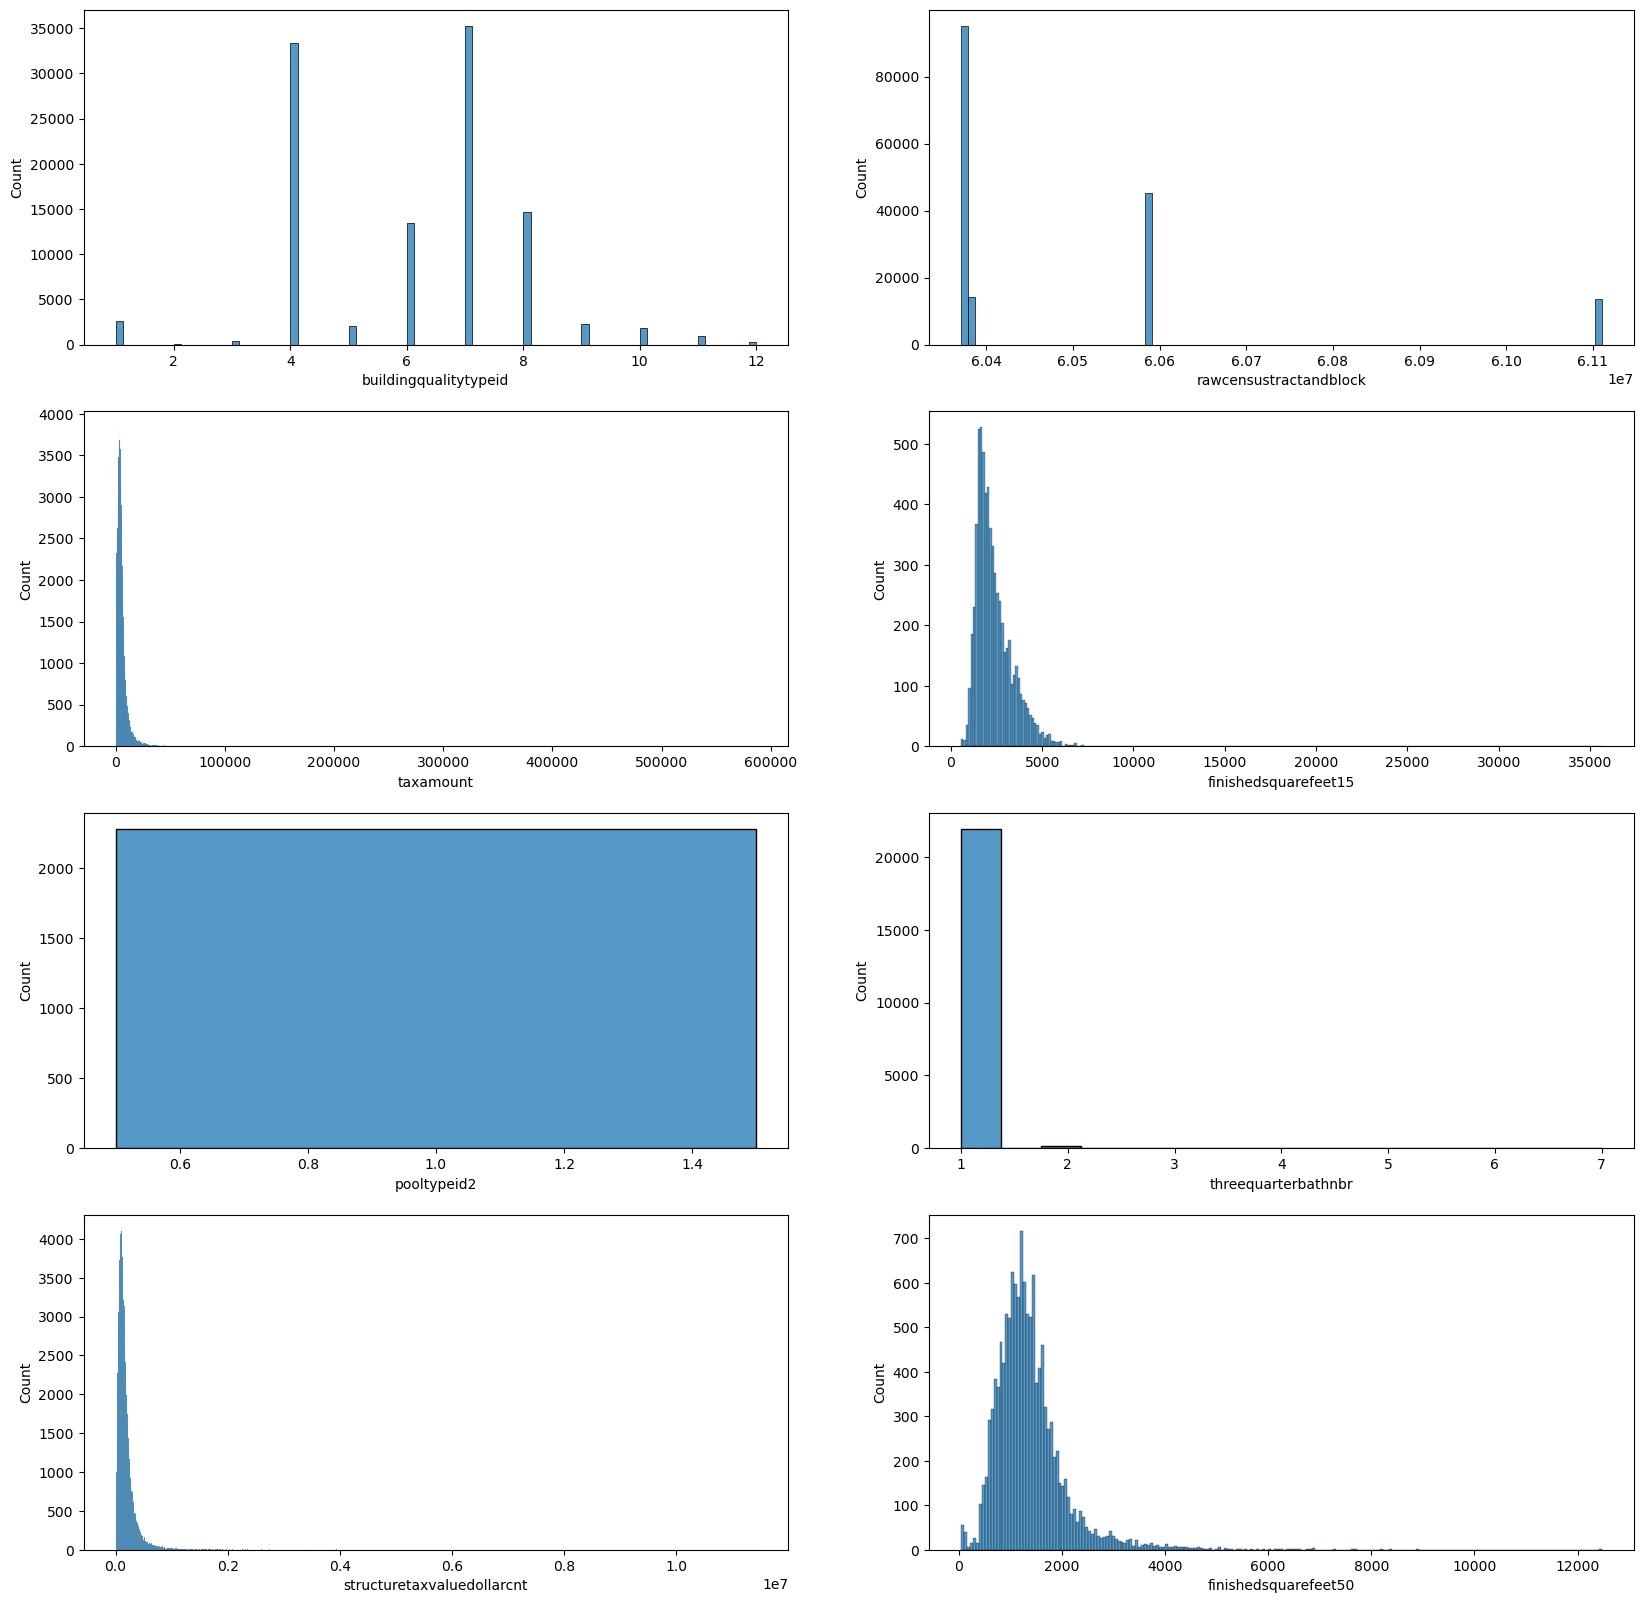

In [173]:
# Let's get a grid of first 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[0:8]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


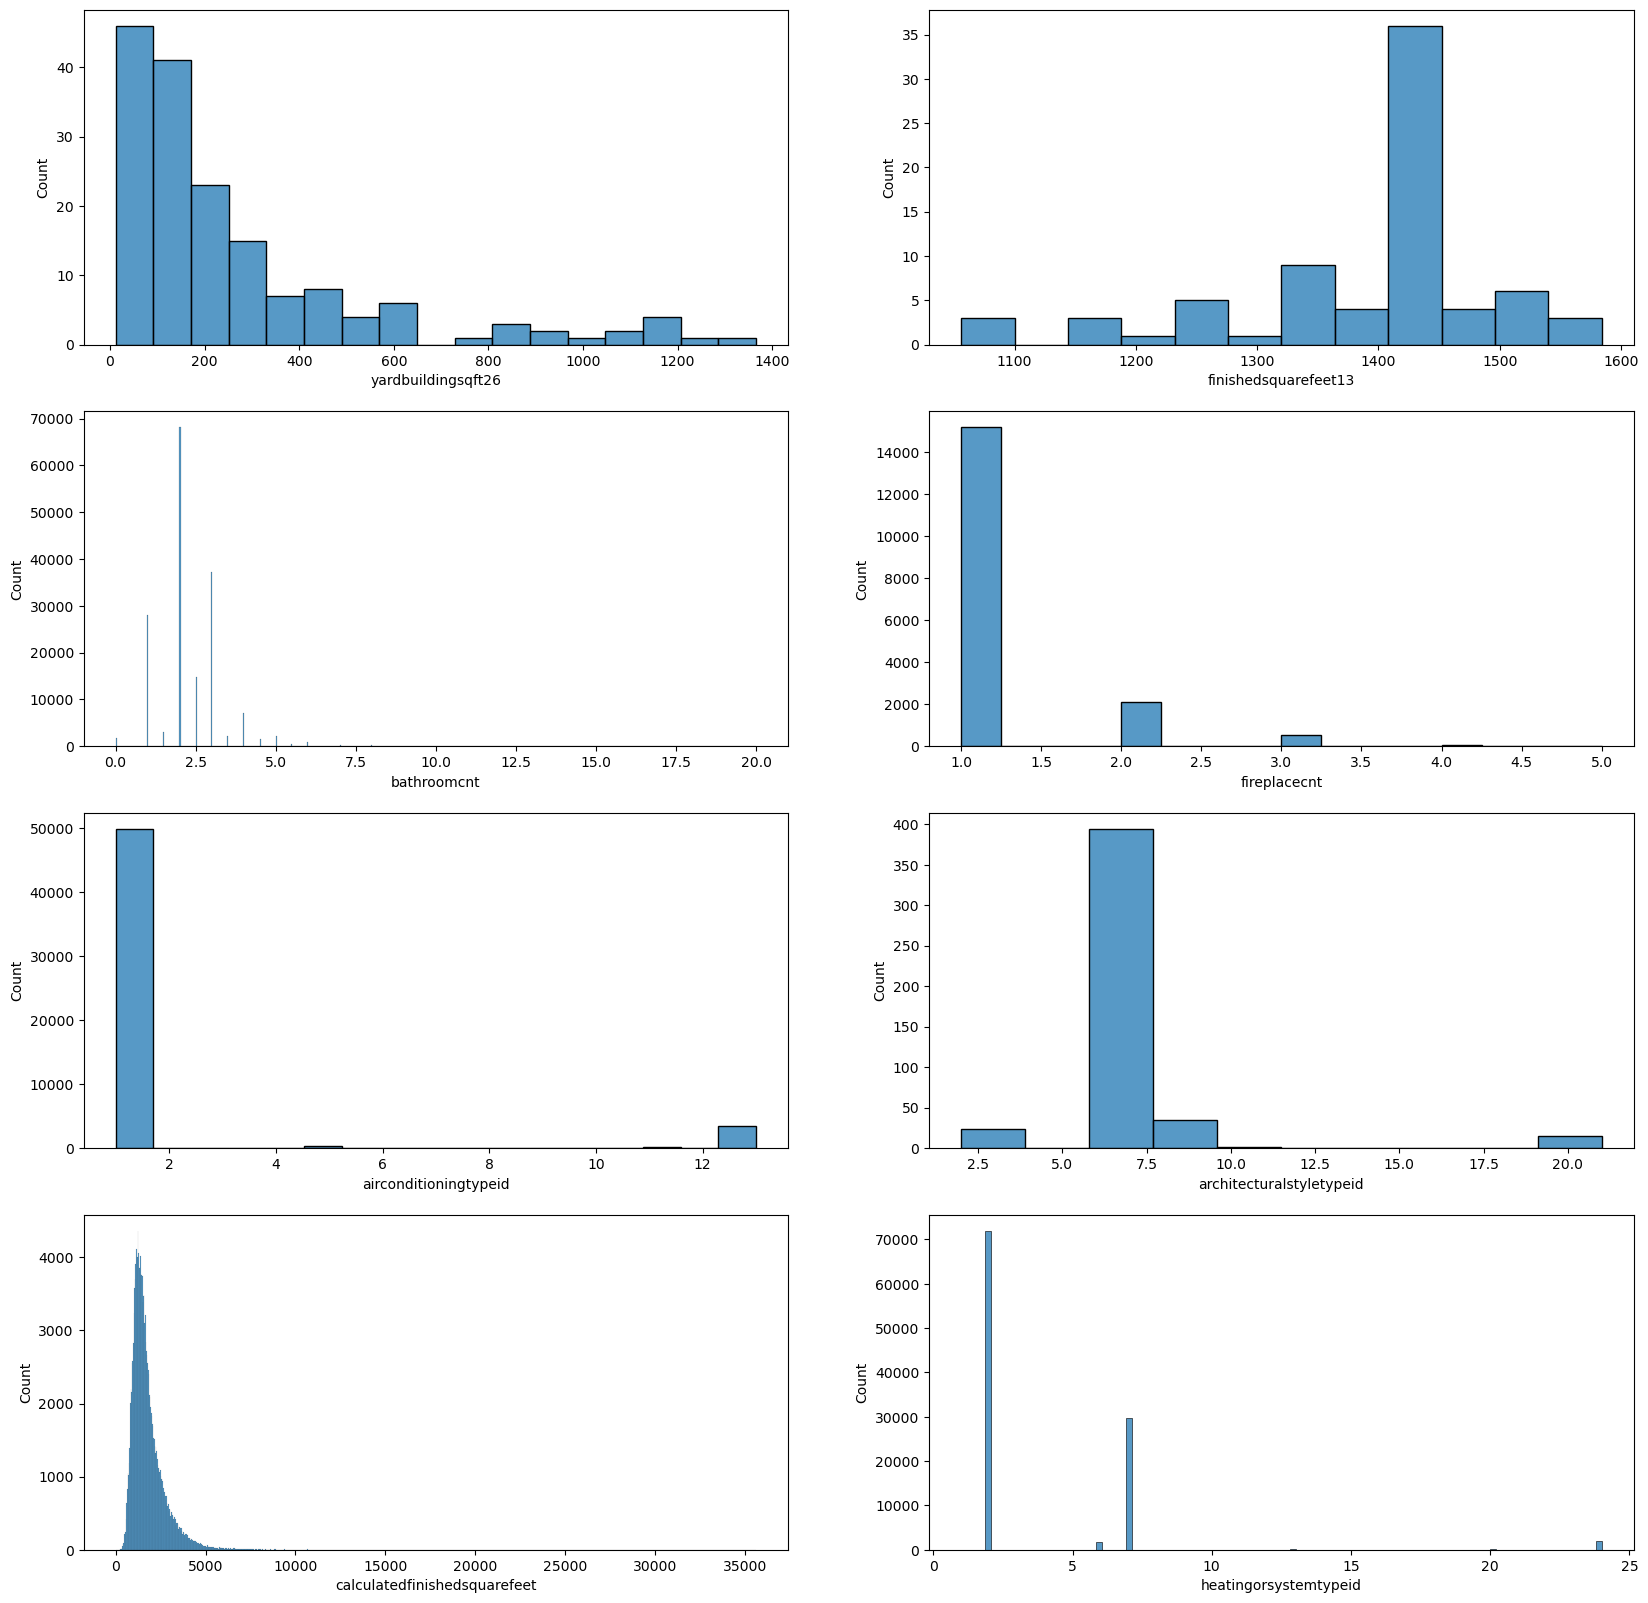

In [174]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[8:16]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


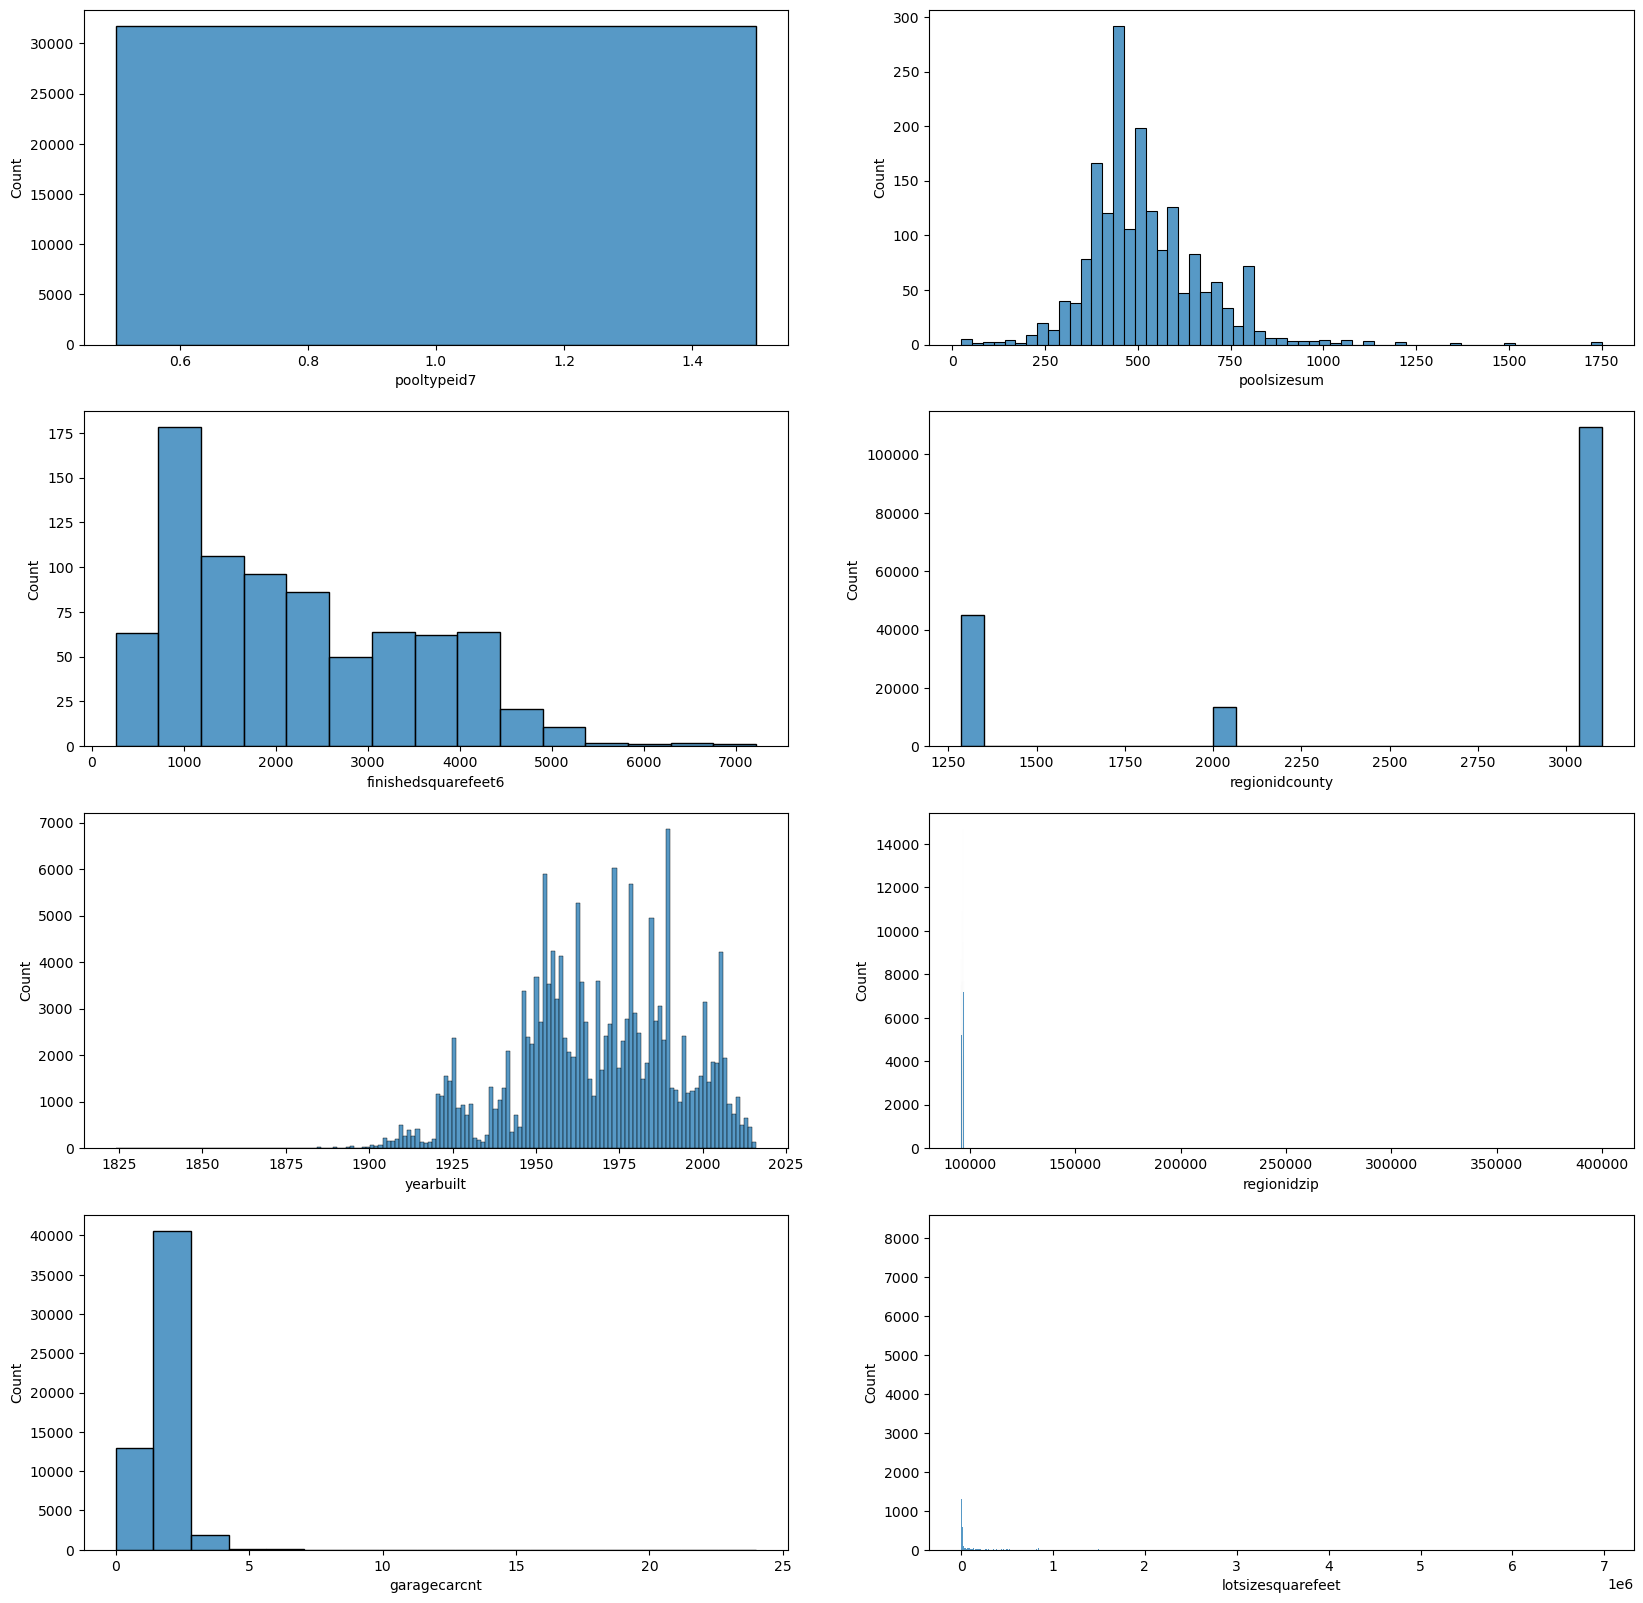

In [175]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[16:24]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


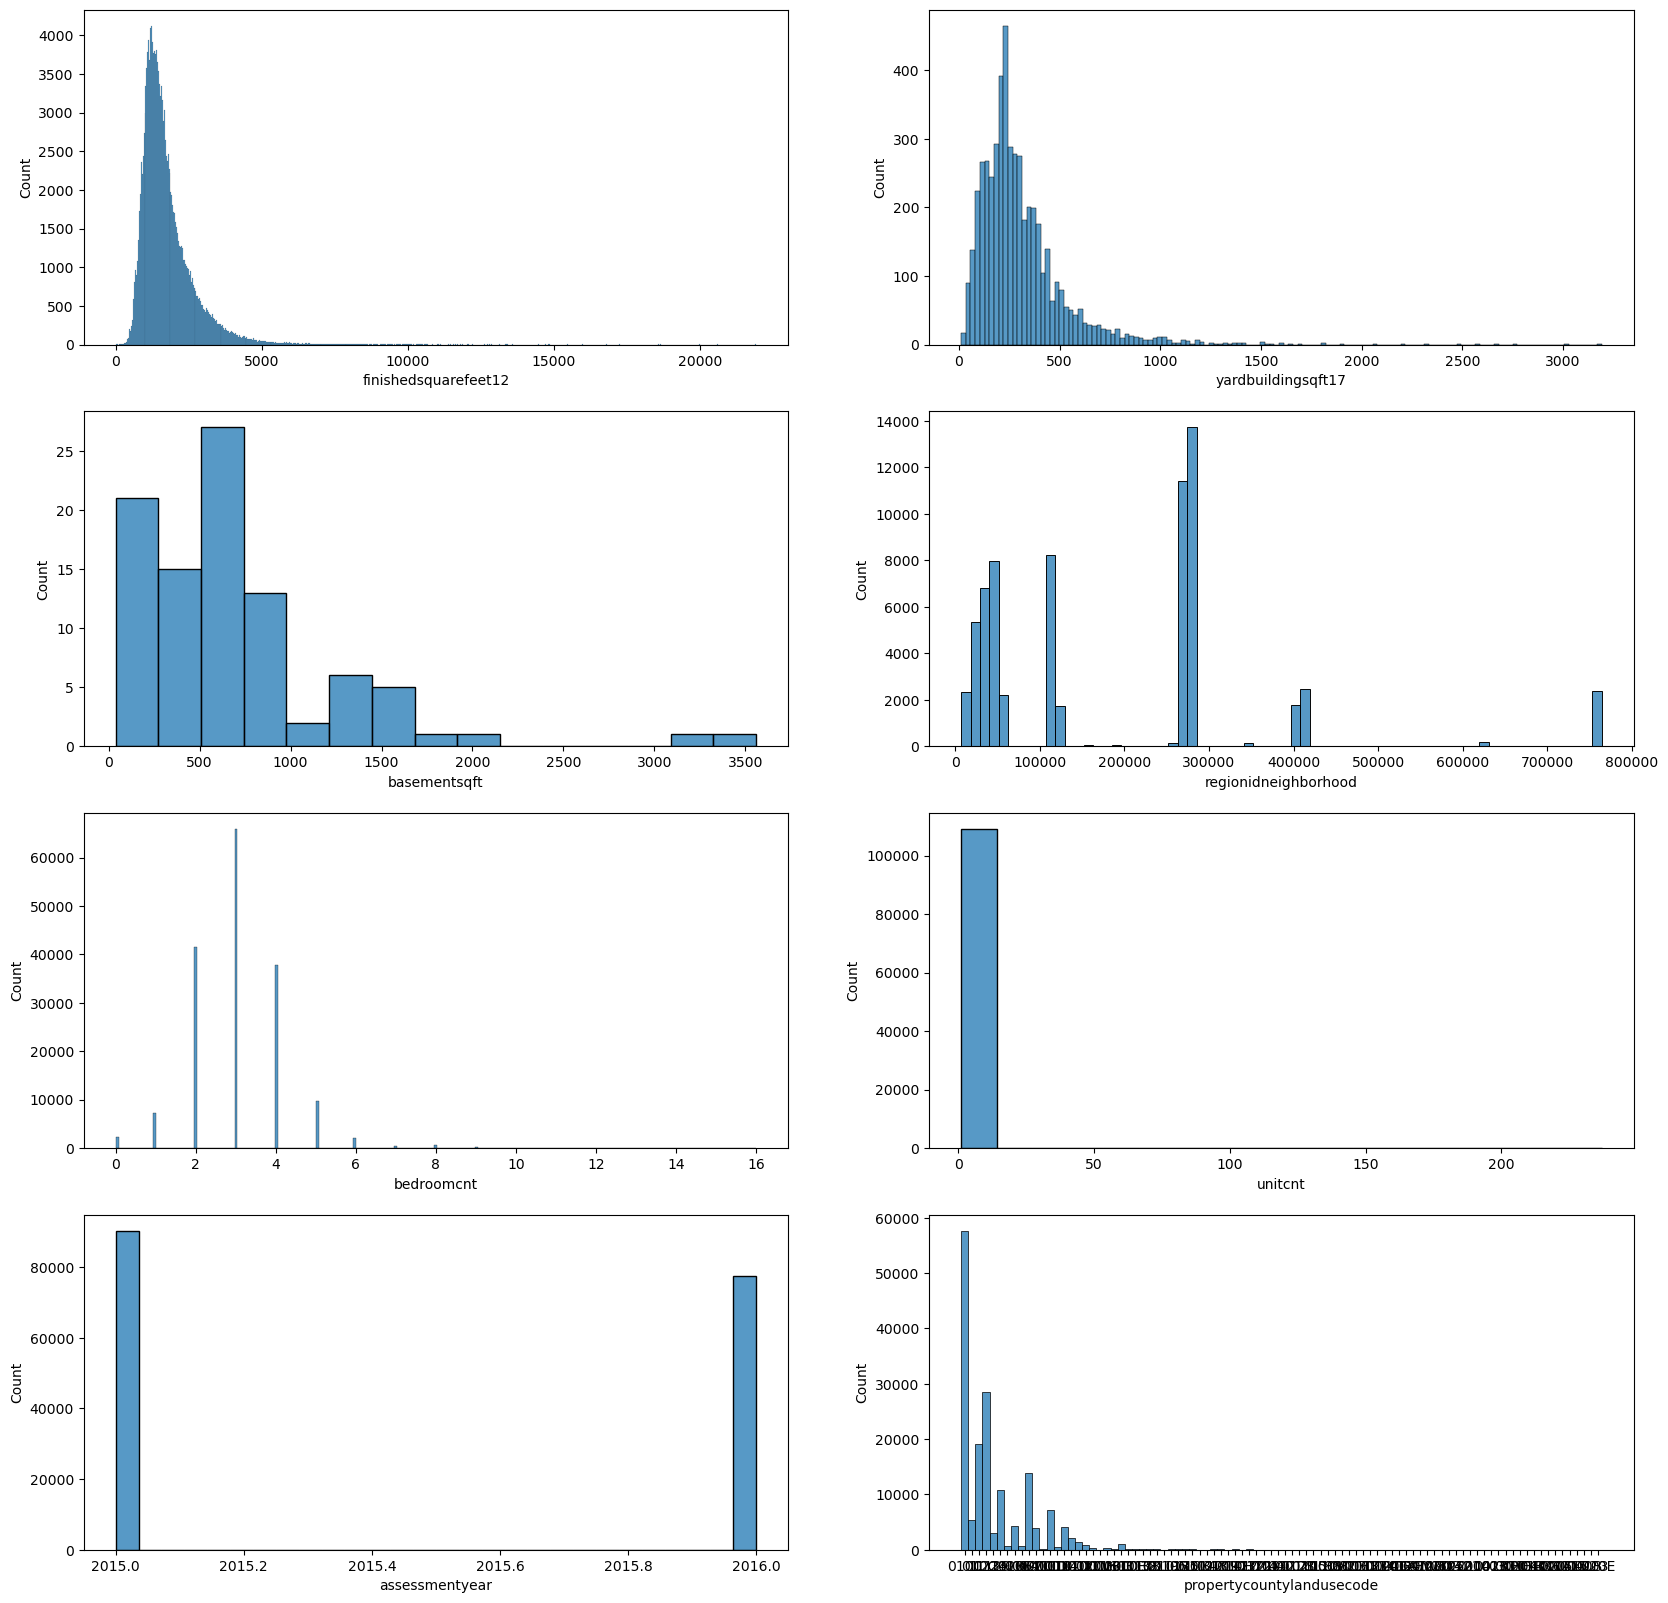

In [176]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[24:32]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


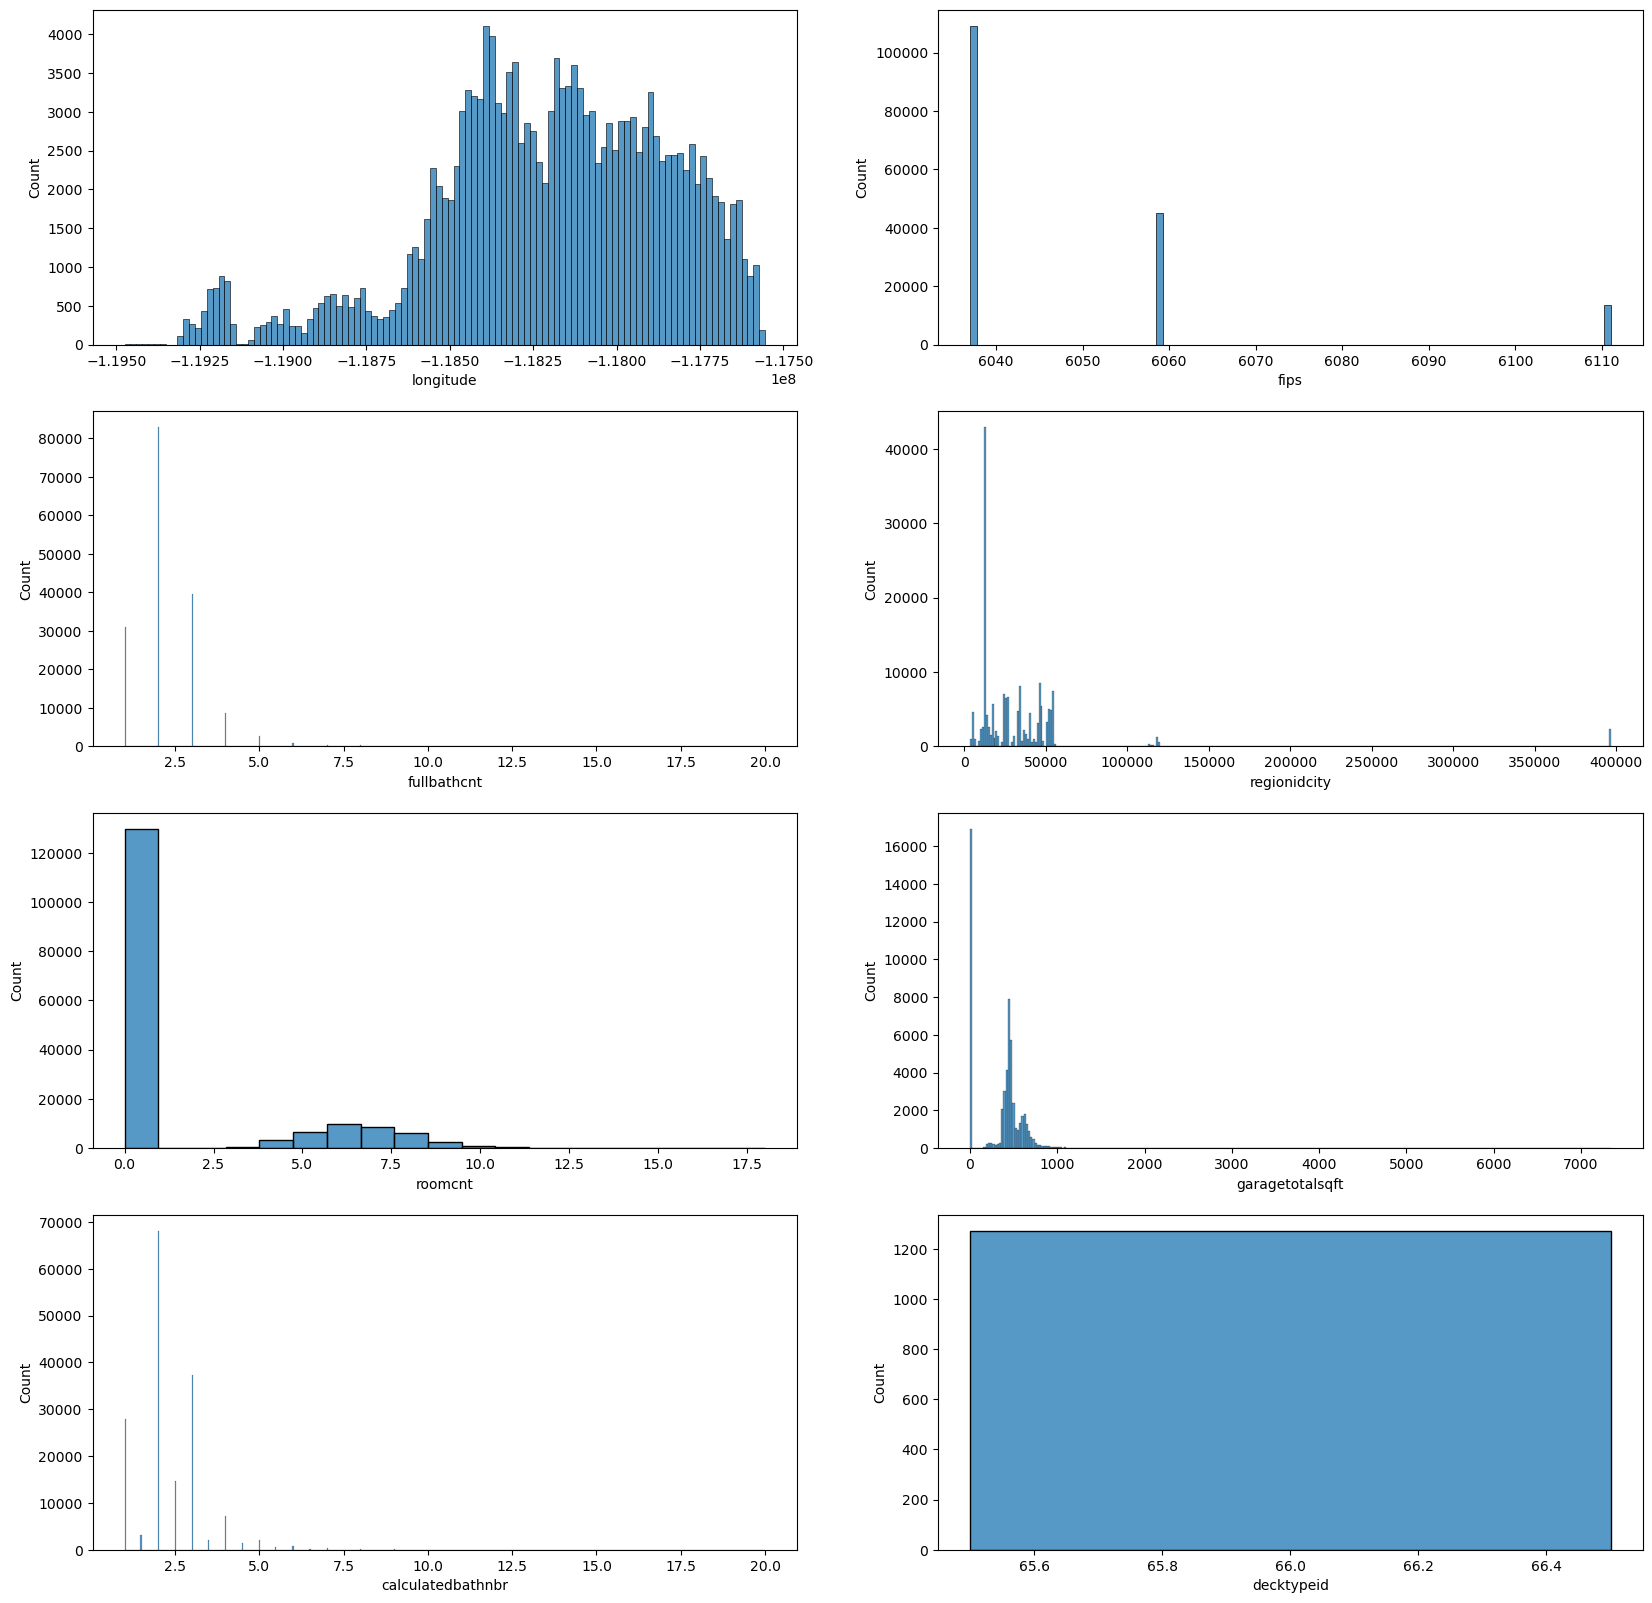

In [177]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[32:40]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


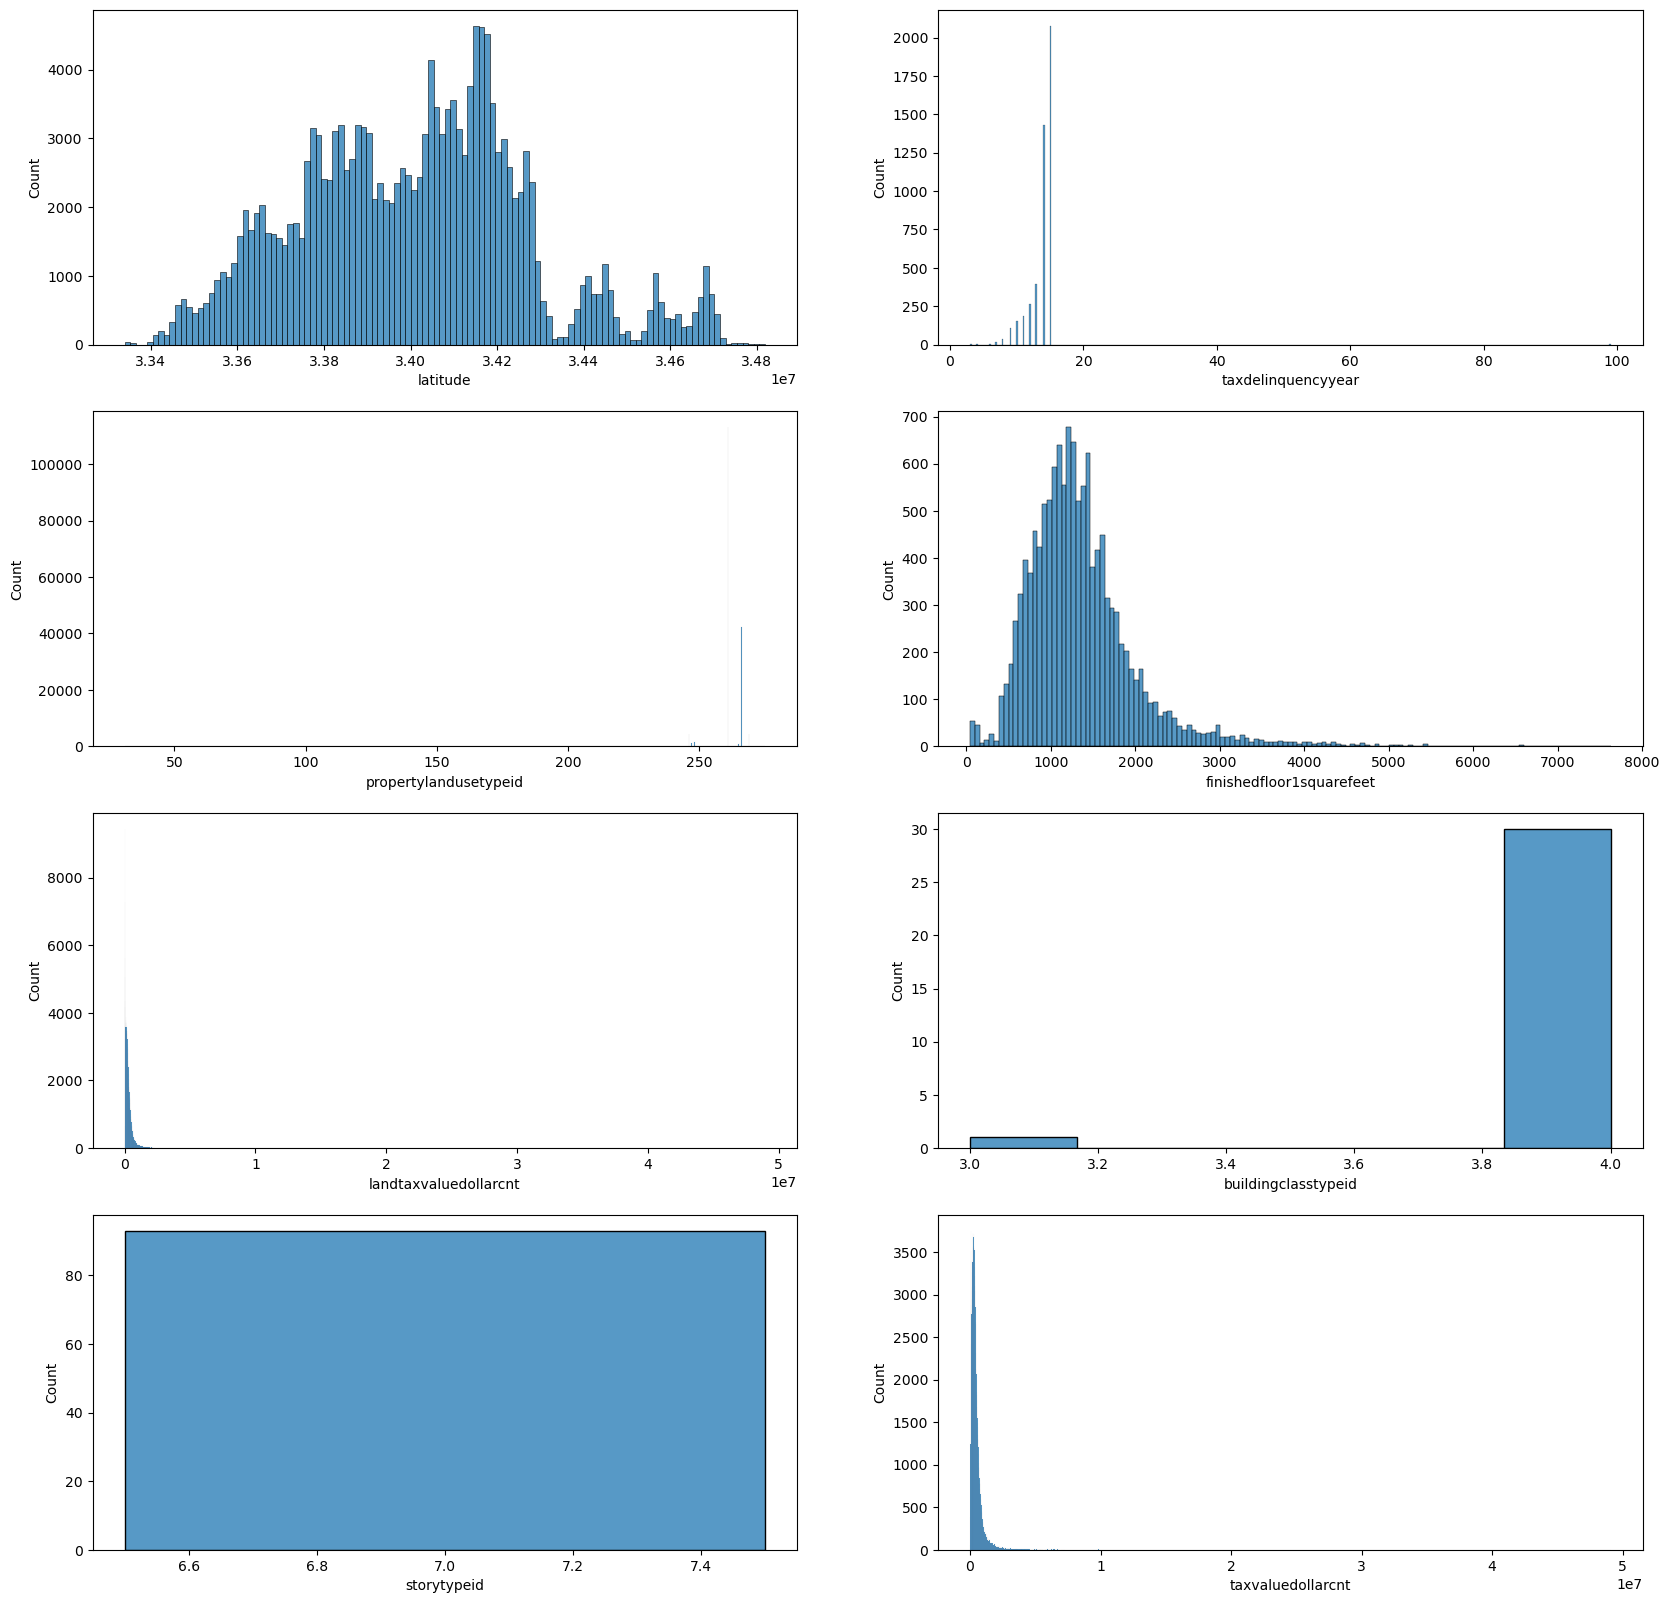

In [178]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[40:48]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


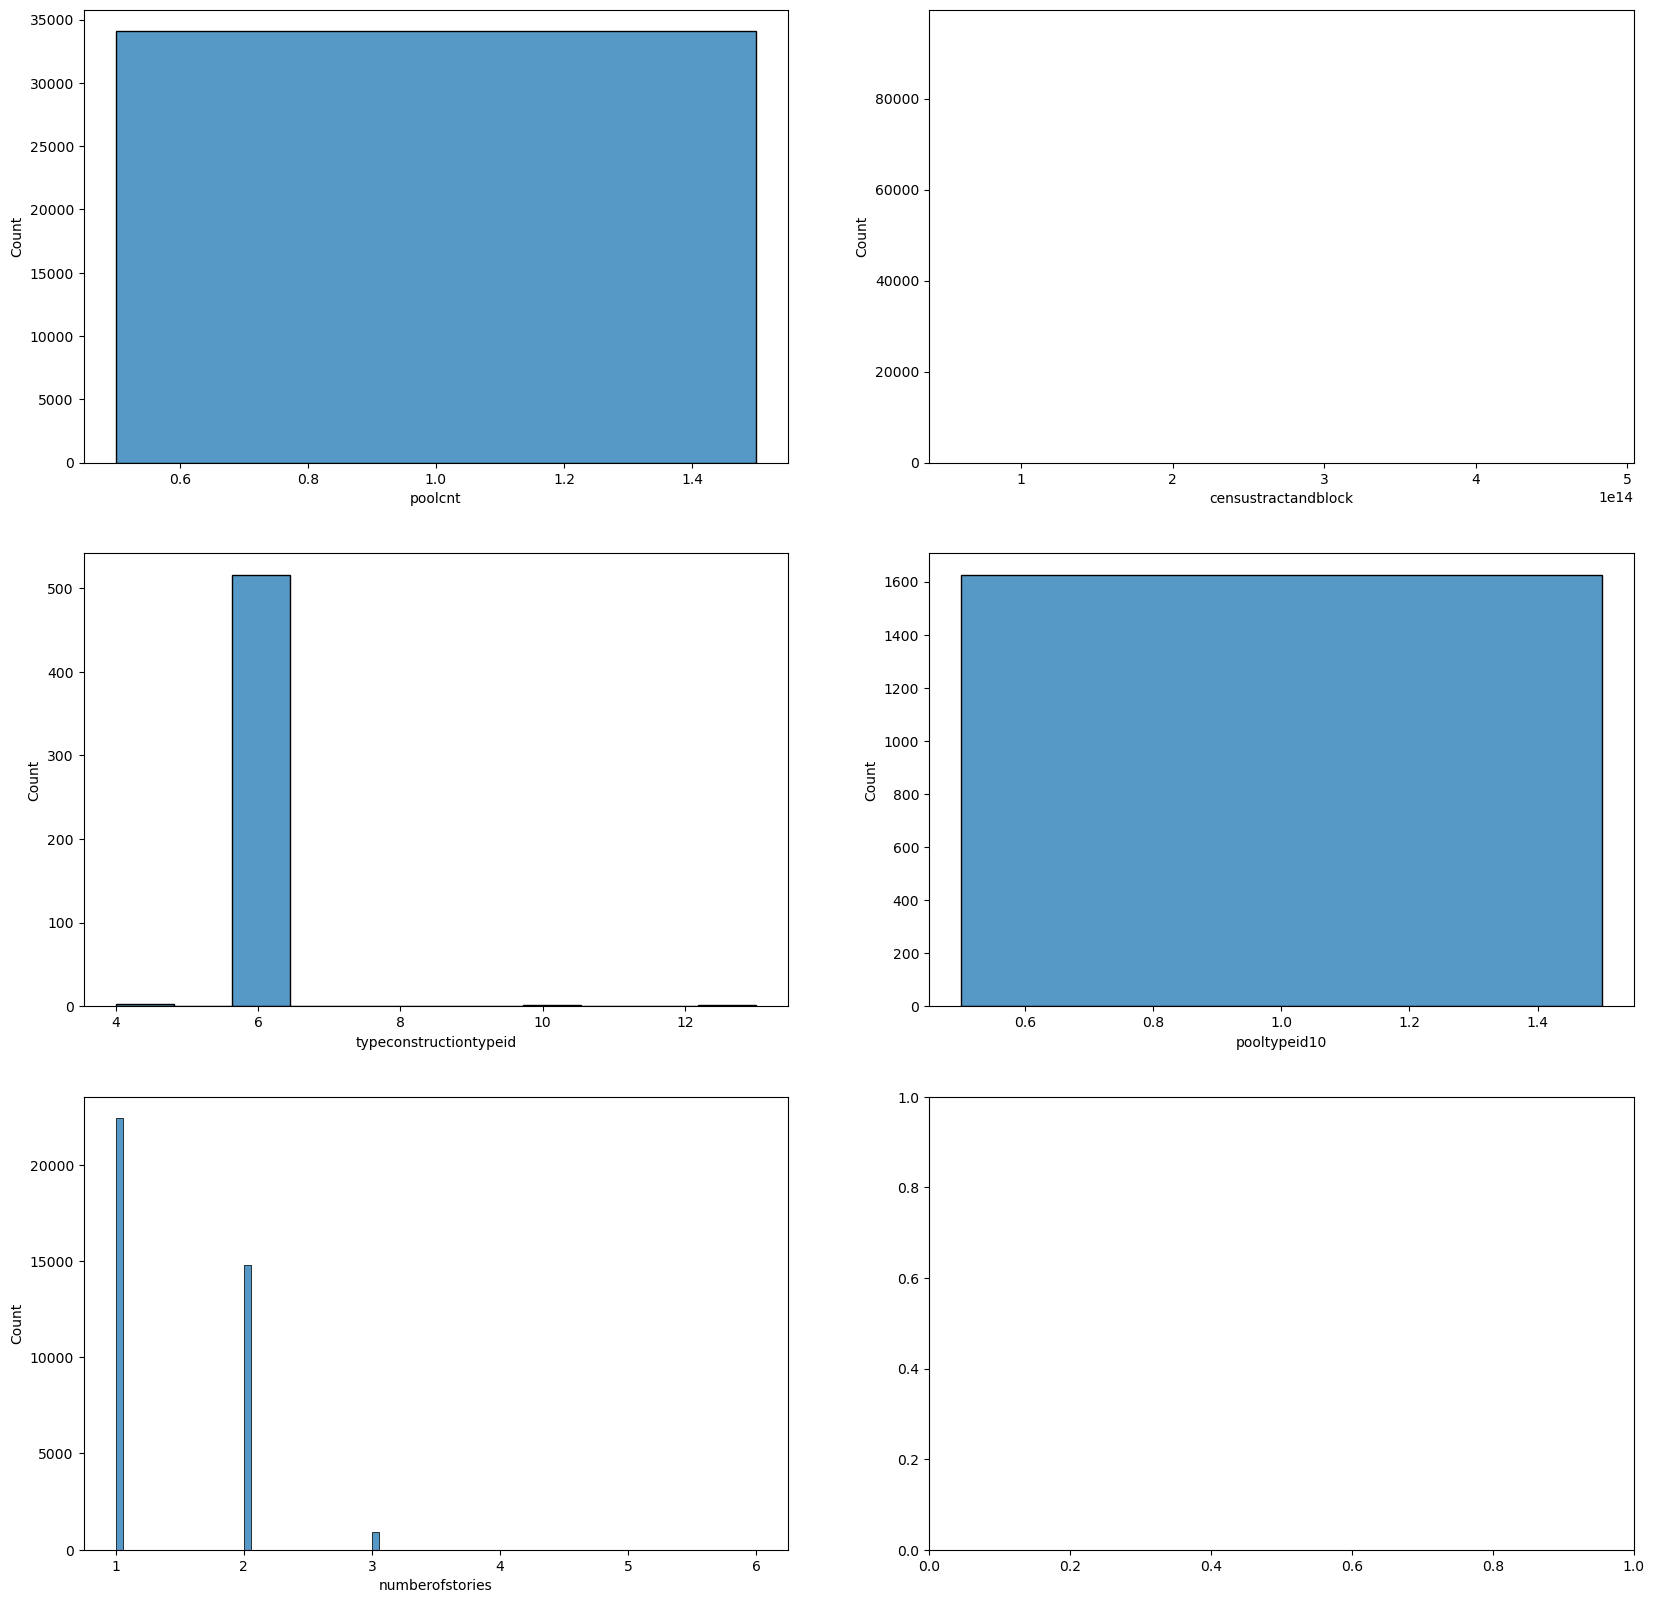

In [179]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[48:]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


In [250]:
# How many rows having missing values, by column?
missing_values = all.isna().sum()
missing_percentages = (missing_values / len(all)) * 100

miss_df = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing counts', 'Missing percentages'])
miss_df = miss_df.sort_values(['Missing percentages', 'Missing counts'], ascending=False)

miss_df = miss_df[miss_df['Missing percentages'] > 90]
miss_df


,Missing counts,Missing percentages
buildingclasstypeid,167823,99.981532
finishedsquarefeet13,167779,99.955318
basementsqft,167761,99.944595
storytypeid,167761,99.944595
yardbuildingsqft26,167689,99.901700
fireplaceflag,167460,99.765272
architecturalstyletypeid,167386,99.721186
typeconstructiontypeid,167332,99.689015
finishedsquarefeet6,167047,99.519225
decktypeid,166582,99.242199


In [251]:
# Drop all columns with missing values > 90%
all.drop(miss_df.index, axis=1, inplace=True)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167854 entries, 0 to 167887
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167854 non-null  int64  
 1   logerror                      167854 non-null  float64
 2   transactiondate               167854 non-null  int64  
 3   transactiondate_year          167854 non-null  int64  
 4   transactiondate_month         167854 non-null  int64  
 5   transactiondate_quarter       167854 non-null  int64  
 6   airconditioningtypeid         53788 non-null   float64
 7   bathroomcnt                   167854 non-null  float64
 8   bedroomcnt                    167854 non-null  float64
 9   buildingqualitytypeid         107173 non-null  float64
 10  calculatedbathnbr             166056 non-null  float64
 11  calculatedfinishedsquarefeet  166992 non-null  float64
 12  finishedsquarefeet12          159519 non-nul

<AxesSubplot: >

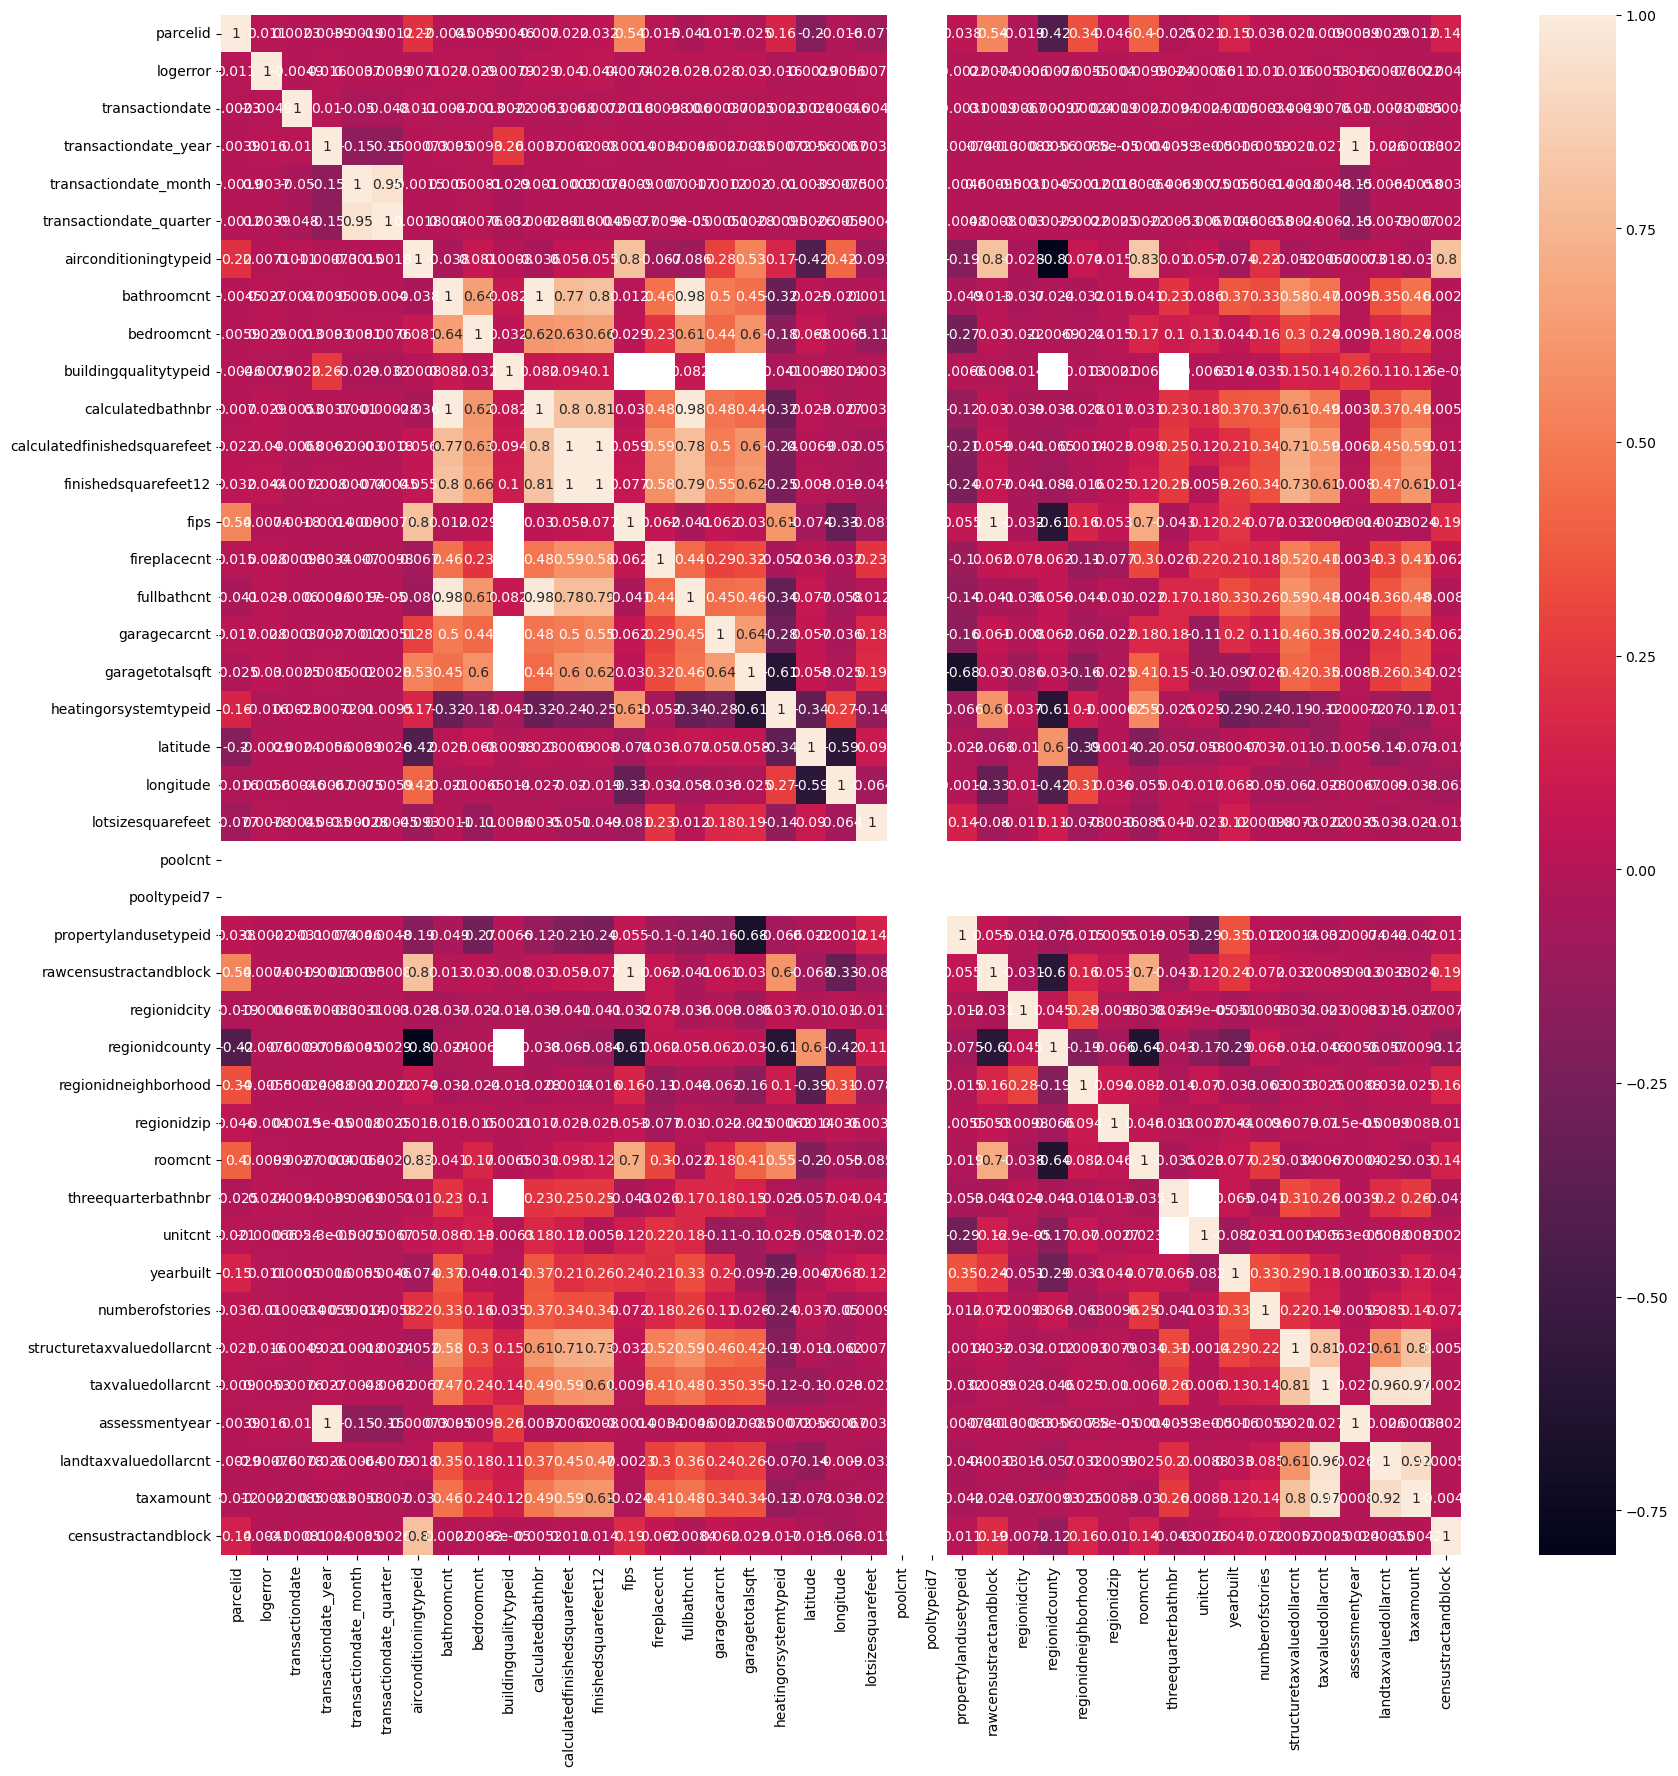

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = all.corr()
correlation

plt.figure(figsize=(20,20))

sns.heatmap(correlation, annot=True)


In [253]:
correlation_features_list = correlation['logerror'].sort_values(ascending=False)
correlation_features_list

logerror                        1.000000
finishedsquarefeet12            0.043977
calculatedfinishedsquarefeet    0.039710
garagetotalsqft                 0.029616
calculatedbathnbr               0.029432
bedroomcnt                      0.028513
fireplacecnt                    0.028223
fullbathcnt                     0.028079
garagecarcnt                    0.027544
bathroomcnt                     0.027038
threequarterbathnbr             0.023777
assessmentyear                  0.016091
transactiondate_year            0.016091
structuretaxvaluedollarcnt      0.015546
yearbuilt                       0.011364
parcelid                        0.010667
numberofstories                 0.010421
roomcnt                         0.009949
lotsizesquarefeet               0.007831
fips                            0.007406
rawcensustractandblock          0.007375
airconditioningtypeid           0.007077
longitude                       0.005644
taxvaluedollarcnt               0.005332
censustractandbl

In [254]:
# Drop all columns with no correlation with logerror -> poolcnt, pooltypeid7
all.drop(['poolcnt', 'pooltypeid7'], axis=1, inplace=True)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167854 entries, 0 to 167887
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167854 non-null  int64  
 1   logerror                      167854 non-null  float64
 2   transactiondate               167854 non-null  int64  
 3   transactiondate_year          167854 non-null  int64  
 4   transactiondate_month         167854 non-null  int64  
 5   transactiondate_quarter       167854 non-null  int64  
 6   airconditioningtypeid         53788 non-null   float64
 7   bathroomcnt                   167854 non-null  float64
 8   bedroomcnt                    167854 non-null  float64
 9   buildingqualitytypeid         107173 non-null  float64
 10  calculatedbathnbr             166056 non-null  float64
 11  calculatedfinishedsquarefeet  166992 non-null  float64
 12  finishedsquarefeet12          159519 non-nul

<AxesSubplot: >

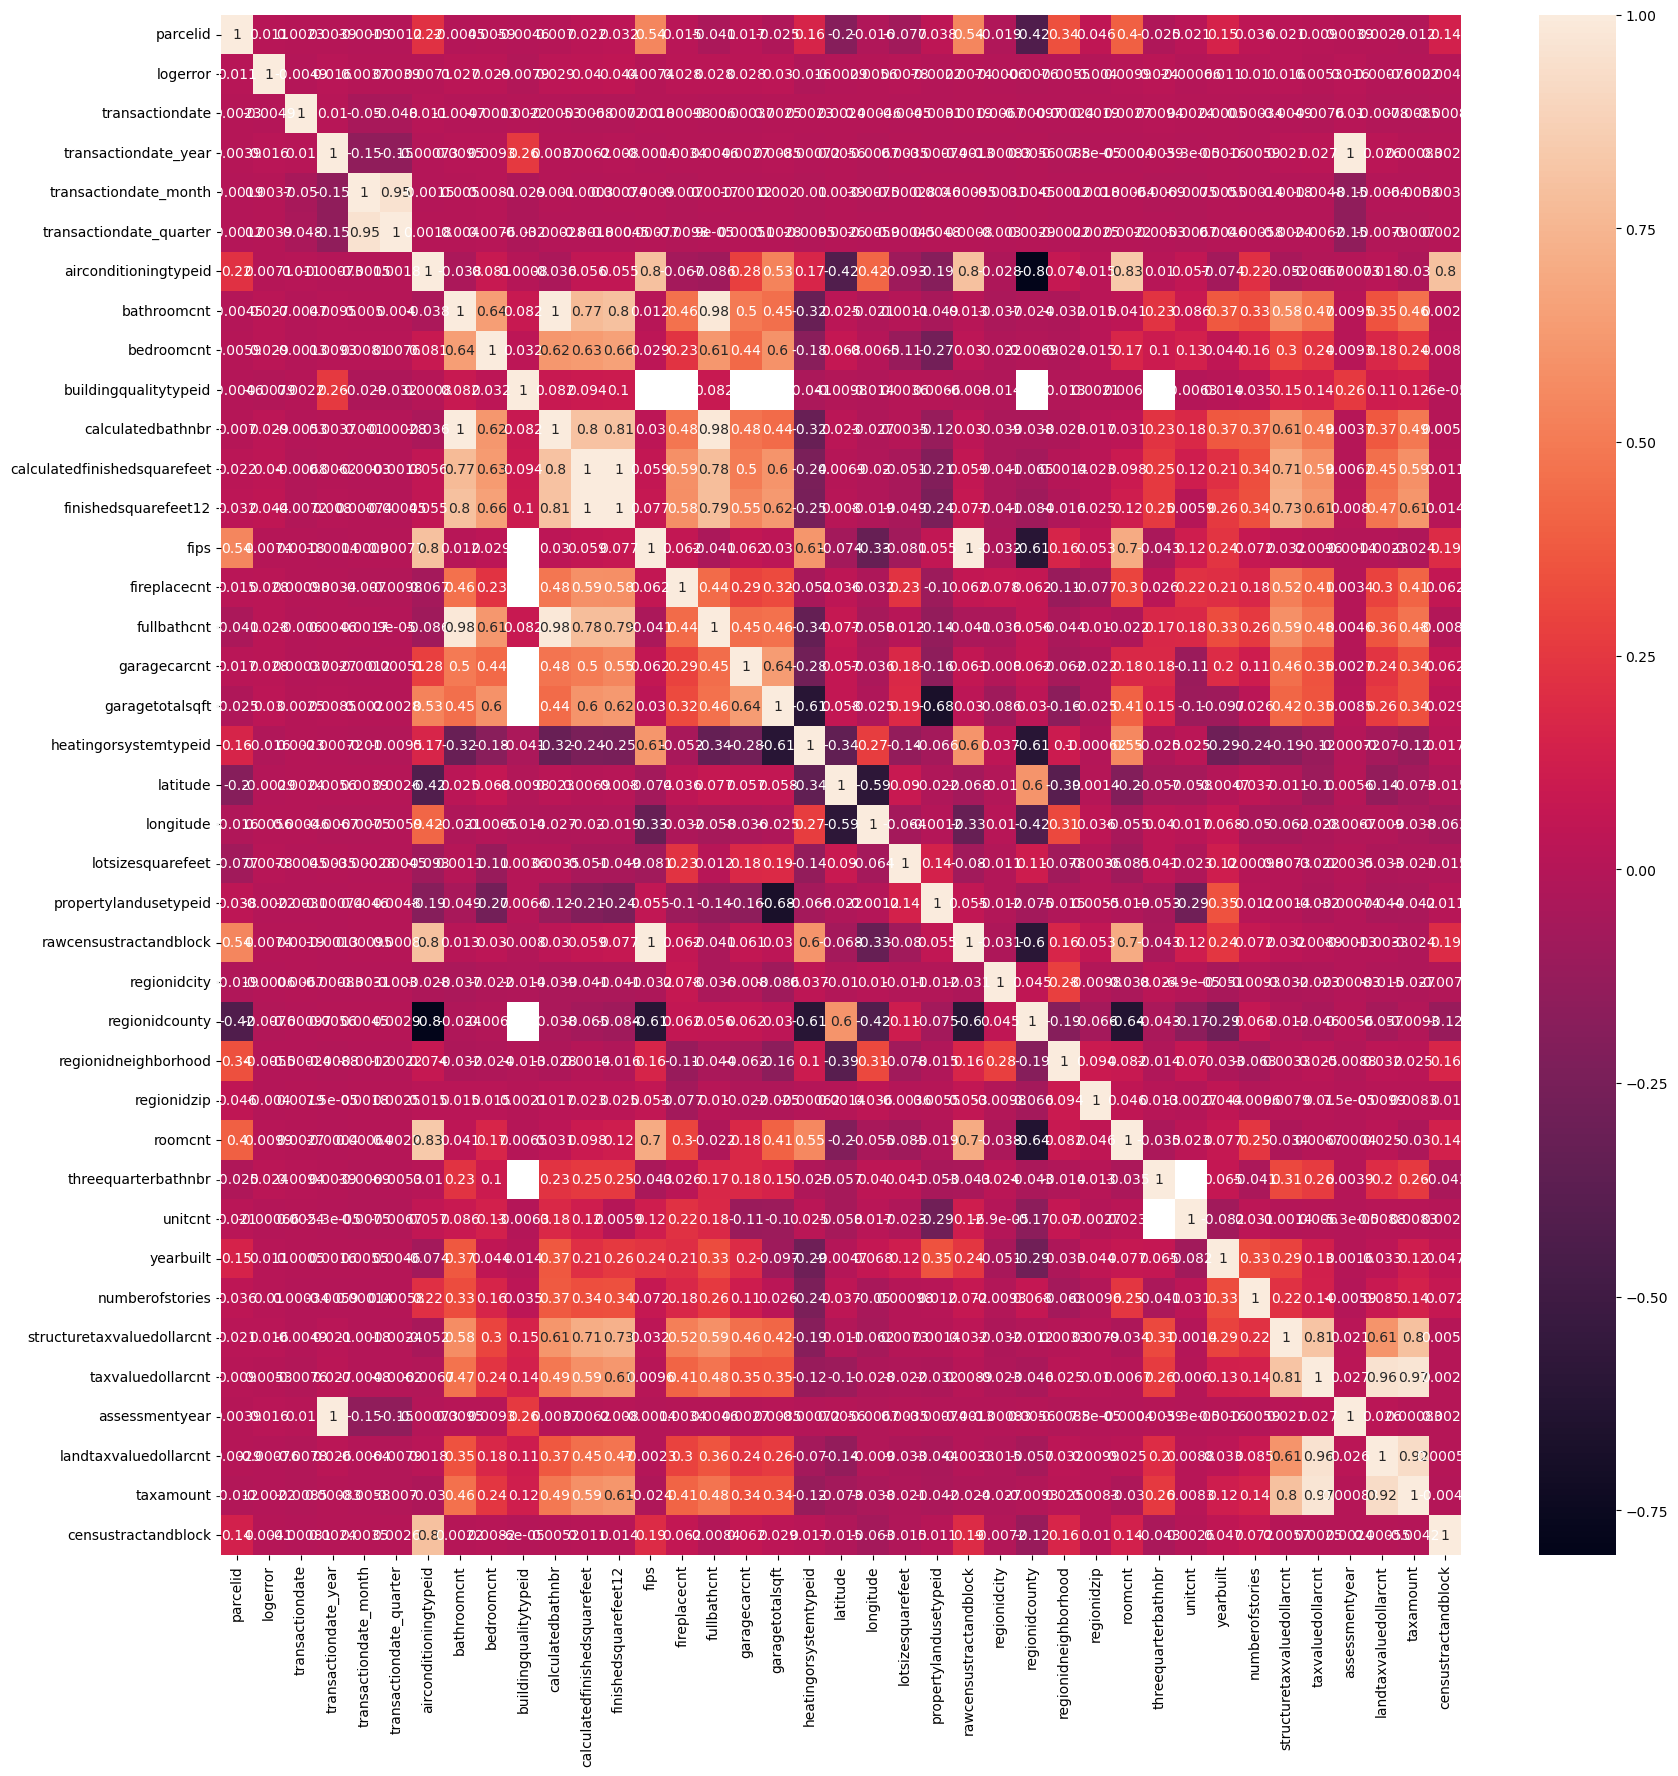

In [255]:
correlation = all.corr()
correlation

plt.figure(figsize=(20,20))

sns.heatmap(correlation, annot=True)

## Imputation

In [261]:
# How many rows having missing values, by column?
missing_values = all.isna().sum()
missing_percentages = (missing_values / len(all)) * 100

miss_df = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing counts', 'Missing percentages'])
miss_df = miss_df.sort_values(['Missing percentages', 'Missing counts'], ascending=False)

miss_df

,Missing counts,Missing percentages
threequarterbathnbr,145739,86.824860
numberofstories,129685,77.260596
garagecarcnt,112397,66.961169
garagetotalsqft,112397,66.961169
regionidneighborhood,100868,60.092700
heatingorsystemtypeid,62203,37.057800
finishedsquarefeet12,8335,4.965625
calculatedbathnbr,1798,1.071169
fullbathcnt,1798,1.071169
parcelid,0,0.000000


In [257]:
# Fill NaN values in fireplacecnt, airconditioningtypeid, regionidcity with zeros
fill_zeros = ['fireplacecnt', 'airconditioningtypeid','regionidcity']
for fill_zero in fill_zeros:
    all[fill_zero].fillna(0, inplace=True)


In [258]:
# A simple imputer replaces NA & missing values with a simple alternative, like the 
# column mean or the most common element (for categorical data).
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")  # Using most-frequent for categorical data.
all[['propertyzoningdesc']] = imp.fit_transform(all[['propertyzoningdesc']])
all[['unitcnt']] = imp.fit_transform(all[['unitcnt']])
all[['calculatedfinishedsquarefeet']] = imp.fit_transform(all[['calculatedfinishedsquarefeet']])
all[['censustractandblock']] = imp.fit_transform(all[['censustractandblock']])
all[['regionidzip']] = imp.fit_transform(all[['regionidzip']])
all[['propertycountylandusecode']] = imp.fit_transform(all[['propertycountylandusecode']])


C:\Users\miloy\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\miloy\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

In [259]:
# A simple imputer replaces NA & missing values with a simple alternative, like the 
# column mean or the most common element (for categorical data).
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")  # Using most-frequent for categorical data.
all[['buildingqualitytypeid']] = imp.fit_transform(all[['buildingqualitytypeid']])
all[['lotsizesquarefeet']] = imp.fit_transform(all[['lotsizesquarefeet']])
all[['yearbuilt']] = imp.fit_transform(all[['yearbuilt']])
all[['taxvaluedollarcnt']] = imp.fit_transform(all[['taxvaluedollarcnt']])


In [260]:
# A simple imputer replaces NA & missing values with a simple alternative, like the 
# column mean or the most common element (for categorical data).
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")  # Using most-frequent for categorical data.
all[['structuretaxvaluedollarcnt']] = imp.fit_transform(all[['structuretaxvaluedollarcnt']])
all[['taxamount']] = imp.fit_transform(all[['taxamount']])
all[['landtaxvaluedollarcnt']] = imp.fit_transform(all[['landtaxvaluedollarcnt']])


In [ ]:
# A simple imputer replaces NA & missing values with a simple alternative, like the 
# column mean or the most common element (for categorical data).
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=3)
all[['threequarterbathnbr']] = imp.fit_transform(all[['threequarterbathnbr']])
all[['numberofstories']] = imp.fit_transform(all[['numberofstories']])
all[['garagecarcnt']] = imp.fit_transform(all[['garagecarcnt']])
all[['garagetotalsqft']] = imp.fit_transform(all[['garagetotalsqft']])
all[['regionidneighborhood']] = imp.fit_transform(all[['regionidneighborhood']])
all[['heatingorsystemtypeid']] = imp.fit_transform(all[['heatingorsystemtypeid']])
all[['finishedsquarefeet12']] = imp.fit_transform(all[['finishedsquarefeet12']])
all[['calculatedbathnbr']] = imp.fit_transform(all[['calculatedbathnbr']])
all[['fullbathcnt']] = imp.fit_transform(all[['fullbathcnt']])


In [238]:
# Print the information of the dataframe
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167854 entries, 0 to 167887
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167854 non-null  int64  
 1   logerror                      167854 non-null  float64
 2   transactiondate               167854 non-null  int64  
 3   transactiondate_year          167854 non-null  int64  
 4   transactiondate_month         167854 non-null  int64  
 5   transactiondate_quarter       167854 non-null  int64  
 6   airconditioningtypeid         167854 non-null  float64
 7   bathroomcnt                   167854 non-null  float64
 8   bedroomcnt                    167854 non-null  float64
 9   buildingqualitytypeid         107173 non-null  float64
 10  calculatedbathnbr             166056 non-null  float64
 11  calculatedfinishedsquarefeet  166992 non-null  float64
 12  finishedsquarefeet12          159519 non-nul

In [ ]:
# A simple imputer replaces NA & missing values with a simple alternative, like the 
# column mean or the most common element (for categorical data).
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")  # Using most-frequent for categorical data.
all[] = imp.fit_transform(all)  # This creates a new Numpy array with missing values imputed.
imputed_titanic

In [ ]:
# Split the concatenated dataframe into train and test dataframes
train, test = train_test_split(all, test_size=0.51, random_state=5, shuffle=True)

# Print the number of rows in each dataframe
print(f'Train shape: {train.shape}')
print(f'Test shape: {train.shape}')

In [ ]:
# Casting to Pandas categorical simplifies plotting later.

all['hashottuborspa'] = all['hashottuborspa'].map({0: "TRUE"})
all['propertycountylandusecode'] = pd.Categorical(all['propertycountylandusecode'])
all['propertyzoningdesc'] = pd.Categorical(all['propertyzoningdesc'])
all['fireplaceflag'] = all['fireplaceflag'].map({0: "TRUE"})
all['taxdelinquencyflag'] = all['taxdelinquencyflag'].map({0: "Y"})
